# Coursework 1

Please enter your name and student number into the Markdown cell below.

#### Name: Zhanyu Shi
#### Student Number: 102353880

This piece of coursework will test you on what you have learnt in the first half of the course. It is due in by 4.00 pm on Monday 29th October and you wil receive your marks and feedback by Monday 19th November. As with the formative coursework, the marks available are indicated for each question. Input your answers into the code and markdown cells provided.

Your coursework will be marked using the same version of Python as is available in the Simon building computer cluster. It is your responsibility to ensure that your code works in this version of Python. If your code does not run correctly due to incompatibility issues between the version of Python you used and the version that is used to mark your coursework, you will not get the marks! Therefore, it is recommended that you test your code in the Simon building cluster before you submit.

In this piece of coursework, we are going to model the temperature along a metal rod that has some heat sources distributed along its length. As discussed in the notebooks, this problem can be modelled by Poisson's equation:

$$\frac{d^2u(x)}{dx^2}=f(x),$$

where $u(x)$ is the temperature in $^\circ$C at position $x$ and $f(x)$ is a function that represents the distributed heat sources. We will assume that the rod is of length 1 m so that $x$ ranges between 0 and 1. The specific form of $f(x)$ you will be asked to use will be generated based on your student ID number (this should be something like 7023839). Please enter it into the code below after the equals sign on the first row, then run the code. You will then see a printed message telling you what $f(x)$ to use for the rest of the coursework. It is essential that you enter the correct student ID number, otherwise you may end up being accused of plagiarism.

In [1]:
ID=102353880
print('For the rest of this coursework, please use f(x) =',3*(ID % 2),'x^4 -',10*(ID % 3),'x^3 +',3*(ID % 5),'x^2 -',6*(ID % 7+1),'x +',(ID % 11))

For the rest of this coursework, please use f(x) = 0 x^4 - 0 x^3 + 0 x^2 - 42 x + 2


In the message above, the symbol <code>^</code> means _to the power of_; so, for example <code>x^3</code> represents $x^3$. Later, we will be using your student ID to generate other pieces of information (such as initial and boundary conditions), so please don't create any new variables called <code>ID</code>! Other variables introduced below are called <code>tempx</code>, <code>tempy</code> and <code>data</code>, so do not create any new variables with these names either and __do not edit any of the code provided__.

As a final tip, make sure that you report all quantities to an appropriate number of significant figures and include the correct units in all of your answers and axes labels. You will lose marks if these are incorrect or omitted.

#### <span style="color: red"> Task 1:</span> Solve Poisson's equation to determine the temperature distribution $u(x)$ using the Euler Backward Method <span style="color: red"> (7 marks)</span>

We will assume that we know the temperature $u_0$ and spatial rate of change of temperature $v_0$ at the left side of the rod, so that we have

$$u(0)=u_0,\hspace{0.5cm}\text{and}\hspace{0.5cm}u'(0)=v_0.$$

The numerical values of $u_0$ and $v_0$ you should use are determined using your student ID number by the code below.

In [75]:
print('Please use u0 =',(ID % 100),'and v0 =',(ID % 101)/100)

Please use u0 = 80 and v0 = 0.76


Compare your numerical solution to the exact solution, which for your $f(x)$ is generated by the code below, by plotting them both on the same set of axes.

In [76]:
print('The exact solution to compare to is u(x) =',(ID % 100),'+',(ID % 101)/100,'x +',(ID % 11)/2,'x^2 -',(ID % 7+1),'x^3 +',(ID % 5)/4,'x^4 -',(ID % 3)/2,'x^5 +',(ID % 2)/10,'x^6')

The exact solution to compare to is u(x) = 80 + 0.76 x + 1.0 x^2 - 7 x^3 + 0.0 x^4 - 0.0 x^5 + 0.0 x^6


Discretise the domain into 1000 pieces and enter your answer into the code cell below.

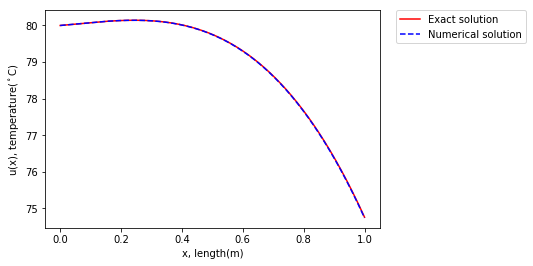

In [100]:
import numpy as np 
import matplotlib.pyplot as plt 

u = [80]    #u0=80
v = [0.76]  #v0=0.76
x0 = 0 
xN = 1  #length of the rod=1m
N = 1000    #1000 pieces in the domain
h = (xN-x0)/N 

x_all = np.linspace(x0,xN,N+1) 
x_excluding = np.linspace(x0+h,xN,N) 

for xj in x_excluding:
    v.append(v[-1]+h*(-42*xj+2))
    u.append(u[-1]+h*v[-1])
    
plt.plot(x_all,80+0.76*x_all+x_all**2-7*x_all**3,'r-',label="Exact solution")
plt.plot(x_all,u,'b--',label="Numerical solution")
plt.xlabel('x, length(m)')
plt.ylabel('u(x), temperature($^\circ$C)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
#plt.show()

To test our modelling prediction, let's assume an experiment was carried out that measured the temperature at 1001 points along the rod. The code below generates some data to simulate this experiment and stores it in a variable called <code>data</code>.

In [78]:
import numpy as np
np.random.seed(ID)
tempx=np.linspace(0,1,1001)
tempy=(ID % 100)+((ID % 101)/100)*tempx+((ID % 11)/2)*tempx**2-(ID % 7+1)*tempx**3+((ID % 5)/4)*tempx**4-((ID % 3)/2)*tempx**5+((ID % 2)/10)*tempx**6
tempy=tempy+np.random.normal(0,abs(tempy[-1]-tempy[1])/10,1001)
data=np.transpose(np.array([tempx,tempy]))
del tempx
del tempy

#### <span style="color: red"> Task 2:</span> Plot the numerical prediction made in Task 1 over the experimental data, plot the residuals showing the difference between the predicted solution and the experimental data and calculate the associated mean relative error <span style="color: red"> (4 marks)</span>

If you did not manage to calculate a numerical prediction using the Euler Backward Method, you can use the exact solution instead.

#### Plot of prediction over experimental data:

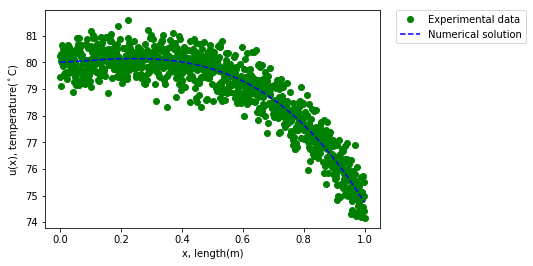

In [79]:
plt.plot(data[:,0],data[:,1],'go',label="Experimental data")
plt.plot(x_all,u,'b--',label="Numerical solution")
plt.xlabel('x, length(m)')
plt.ylabel('u(x), temperature($^\circ$C)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

#### Residual plot and mean relative error:

The mean relative error is 0.005153


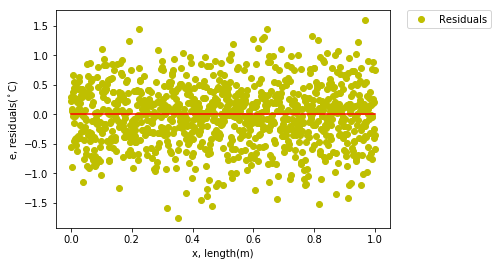

In [80]:
Residuals = data[:,1]-u
plt.plot(x_all,Residuals,'yo',label="Residuals")
plt.plot(x_all,0*x_all,'r-')
plt.xlabel('x, length(m)')
plt.ylabel('e, residuals($^\circ$C)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

Abs_error = abs(Residuals)
Relative_error = Abs_error/abs(data[:,1])
MeanRelative_error = np.mean(Relative_error)
print("The mean relative error is %f"%MeanRelative_error)

#### <span style="color: red"> Task 3:</span> Statistically analyse the residuals <span style="color: red"> (6 marks)</span>

Plot the residuals as a histogram with 40 bins in relative frequency form, fit a normal distribution to them, plot it over the histogram, and report the standard deviation of the fitted distribution. Then use hypthesis testing to determine whether the residuals are normally distributed at the 10% significance level. Report the conclusion of the test as a sentence, giving the calculated p-value.

The standard deviation of the fitted distribution is sigma=0.518581
The residuals are normally distributed at the 10% significance level, the p-value is 0.256939.


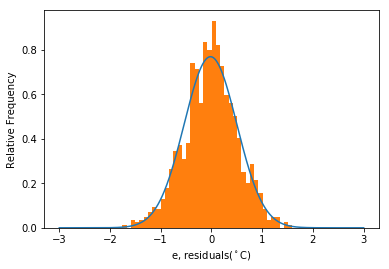

In [81]:
from scipy import stats

mu, sigma = stats.norm.fit(Residuals)
x = np.linspace(-3,3,601)

plt.plot(x,norm.pdf(x,mu,sigma))

plt.hist(Residuals,40,normed=True)
plt.ylabel('Relative Frequency')
plt.xlabel('e, residuals($^\circ$C)');
print('The standard deviation of the fitted distribution is sigma=%f'%(sigma))
#plt.show()

k2, p = stats.normaltest(Residuals)
alpha = 0.1
if p < alpha:
    print('The residuals are not normally distributed at the 10%% significance level')
else:
    print('The residuals are normally distributed at the 10%% significance level, the p-value is %f.'%p)
    

#### <span style="color: red"> Task 4:</span> Solve Poission's equation to determine the temperature distribution $u(x)$ using the Finite Element Method <span style="color: red"> (4 marks)</span>

We will now assume that we instead know the temperatures at either end of the rod, $u_0$ and $u_1$, so that we have

$$u(0)=u_0,\hspace{0.5cm}\text{and}\hspace{0.5cm}u(1)=u_1.$$

The numerical values of $u_0$ and $u_1$ you should use are determined using your student ID number by the code below.

In [82]:
print('Please use u0 =',(ID % 100),'and u1 =',(ID % 100)+1)

Please use u0 = 80 and u1 = 81


Compare your numerical solution to the exact solution, which for your $f(x)$ is generated by the code below, by plotting them both on the same set of axes.

In [83]:
print('The exact solution to compare to is u(x) =',(ID % 100),'+',(ID % 100)+1-(ID % 100)-(ID % 11)/2+(ID % 7+1)-(ID % 5)/4+(ID % 3)/2-(ID % 2)/10,'x +',(ID % 11)/2,'x^2 -',(ID % 7+1),'x^3 +',(ID % 5)/4,'x^4 -',(ID % 3)/2,'x^5 +',(ID % 2)/10,'x^6')

The exact solution to compare to is u(x) = 80 + 7.0 x + 1.0 x^2 - 7 x^3 + 0.0 x^4 - 0.0 x^5 + 0.0 x^6


Use linear finite element shape functions, 12 nodal points and enter your answer into the code cell below.

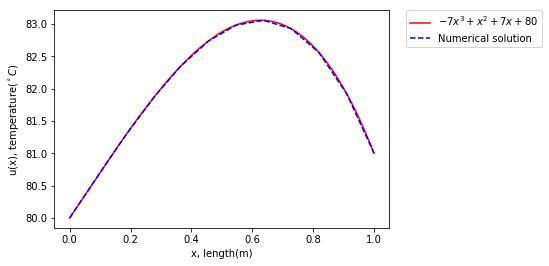

In [84]:
import scipy.integrate as integrate

def LFESF(x,j,N): #define a function called LFESF (which stands for linear finite element shape function)
    Xj=(j-1)/(N-1) #define X_j
    Xjminus=(j-2)/(N-1) #define X_{j-1}
    Xjplus=j/(N-1) #define X_{j+1}
    if x<Xjminus:
        output=0.0
    elif x<Xj:
        output=(x-Xjminus)/(Xj-Xjminus)
    elif x<Xjplus:
        output=(Xjplus-x)/(Xjplus-Xj)
    else:
        output=0.0
    return output

def LFESFVector(x,j,N): #a version of the above that accepts a vector as the input
    output=np.zeros(len(x))
    for xj in range(len(x)): 
        output[xj]=LFESF(x[xj],j,N)
    return output

def DLFESF(x,j,N): #define a function called LFESF (which stands for linear finite element shape function)
    Xj=(j-1)/(N-1) #define X_j
    Xjminus=(j-2)/(N-1) #define X_{j-1}
    Xjplus=j/(N-1) #define X_{j+1}
    if x<Xjminus:
        output=0.0
    elif x<Xj:
        output=1/(Xj-Xjminus)
    elif x<Xjplus:
        output=-1/(Xjplus-Xj)
    else:
        output=0.0
    return output

def DLFESFVector(x,j,N): #a version of the above that accepts a vector as the input
    output=np.zeros(len(x))
    for xj in range(len(x)): 
        output[xj]=DLFESF(x[xj],j,N)
    return output

#Algorithm 2 Step 1:

N = 12

#Algorithm 2 Step 2:
U=np.ones(N-2) #set some initial guesses for the constants Uj, need U to have length N-2 since j ranges between 2 and N-1

#Algorithm 2 Step 3:
g0 = 80 #left boundary condtion
g1 = 81 #right boundary condition

def up(x): #define a function up that gives the particular solution that satisfies the boundary conditions
    output=g0*LFESF(x,1,N)+g1*LFESF(x,N,N) #the function is given in terms of the linear finite element shape functions at either end of the domain
    return output

def Dup(x): #define a function up that gives the derivative of the particular solution
    output=g0*DLFESF(x,1,N)+g1*DLFESF(x,N,N) #the function is given in terms of the derivatives of the linear finite element shape functions at either end of the domain
    return output

def uh(x,U):  #define a function uh that gives the solution that satisfies homogeneous boundary conditions
    output=np.zeros(len(x)) #first we set the output up to have the right length
    LFESFList=np.zeros(len(U)) #and we make sure the list of linear finite element shape functions has the right length
    for xj in range(len(x)): #for each input x value...
        for k in range(len(U)): #and each entry in the list of consants U...
            LFESFList[k]=LFESF(x[xj],k+2,N) #we calculate the value of the associated linear finite element shape function
        output[xj]=sum(U*LFESFList) #and output the constants times the shape functions
    return output #and return the output

#Set up while loop
tol = 0.0000001 #the tolerance is 0.0000001
maxres = tol+1 
while (maxres>tol):

#Algorithm 2 Step 4:
    r=np.zeros(N-2)
    myint=np.zeros(N-2)
    Nrange=range(N-2)
    for k in Nrange: 
        for j in Nrange: 
            myint[j]=integrate.quad(lambda x: U[j]*DLFESF(x,j+2,N)*DLFESF(x,k+2,N),0,1,limit=100)[0]
        r[k]=-(integrate.quad(lambda x: Dup(x)*DLFESF(x,k+2,N),0,1,limit=100)[0]+sum(myint)
               +integrate.quad(lambda x: (-42*x+2)*LFESF(x,k+2,N),0,1,limit=100)[0]) #f(x)=-42*x+2
    maxres=max(abs(r))

#Algorithm 2 Steps 5:    
    J=np.zeros((N-2,N-2))
    for j in range(N-2): 
        for k in range(N-2): 
            J[k,j]=-integrate.quad(lambda x: DLFESF(x,j+2,N)*DLFESF(x,k+2,N),0,1,limit=100)[0]
    deltaU=np.linalg.solve(J,-r) #this step solves the matrix equation J.deltaU=-r for deltaU
        
#Algorithm 2 Step 6:        
    U=U+deltaU
    
#Algorithm 2 Step 7:  
def FinalU(x,U):
    output=np.zeros(len(x))
    LFESFList=np.zeros(len(U)) #and we make sure the list of linear finite element shape functions has the right length
    for xj in range(len(x)): 
        for k in range(len(U)): 
             LFESFList[k]=LFESF(x[xj],k+2,N) #we calculate the value of the associated linear finite element shape function
        output[xj]=up(x[xj])+sum(U*LFESFList) #we have changed our particular solution to Up(x)=1+x
    return output

x = np.linspace(0,1,501)

plt.plot(x,80+7*x+x**2-7*x**3,'-r', label="$-7x^3+x^2+7x+80$") #plot the exact equation
plt.plot(x,FinalU(x,U),'--b', label="Numerical solution") #plot numerical solution
plt.xlabel('x, length(m)')
plt.ylabel('u(x), temperature($^\circ C$)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.); #plot legend

#### <span style="color: red"> Task 5:</span> Use finite differencing to plot the spatial rate of change of $u(x)$, where $u(x)$ is the exact solution from Task 4.<span style="color: red"> (4 marks)</span>

Instead of using the differencing formulae introduced in week 4, use this approximation to the derivative:

$$u'(x)\approx\frac{-u(x+2h)+8u(x+h)-8u(x-h)+u(x-2h)}{12h}$$

and plot the approximate rate of change on the same axes as the exact rate of change over the length of the rod. Use $h=0.1$ and enter your answer into the code cell below.

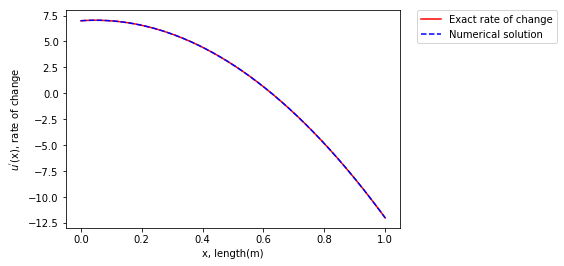

In [99]:
def u4(x): # u(x) from task 4
    return -7*x**3+x**2+7*x+80

def ForwardFunc(x,h):
    return (-u4(x+2*h)+8*u4(x+h)-8*u4(x-h)+u4(x-2*h))/(12*h)

x = np.linspace(0,1,501)
plt.plot(x,-21*x**2+2*x+7,'r-',label="Exact rate of change")
plt.plot(x,ForwardFunc(x,0.1),'b--',label="Numerical solution")
plt.xlabel('x, length(m)')
plt.ylabel('$u^{\'}$(x), rate of change');
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.); #plot legend

### For use by markers only:

#### Total mark: $\hspace{1cm}$/25

#### As a percentage: